In [1]:
# KNN from scratch without the use of scikit-learn library
# Data - Breast Cancer Wisconsin (Diagnostic) Data Set
# Predict whether the cancer is benign or malignant

In [2]:
# Import libraries
import pandas as pd
import statistics as stat
import numpy as np
from datetime import datetime
from scipy import stats

import matplotlib.pyplot  as plt 

In [3]:
# Import dataset
screening_data = pd.read_csv(r'C:\Users\Yuliya.DESKTOP-FMS37R3\Documents\Data_Science\Projects\Machine Learning Models\datasets\breast_cancer_diagnostic.csv')

In [4]:
# Review dataset

def review_dataset(df):
    print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')
    print(f'The column names are: {list(df.columns)}')
    print(f'There are {df.isna().sum().sum()} missing values')
    print(f'There are {df.duplicated().sum()} duplicate rows')
    print(f'\nThe first 5 rows of dataset:')
    display(df.head(5))
    print(f'\nReview columns and data types')
    display(df.info())
    print('\nSummary statustics: ')
    display(df.describe())

    

In [5]:
review_dataset(screening_data)

The dataset has 569 rows and 33 columns
The column names are: ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']
There are 569 missing values
There are 0 duplicate rows

The first 5 rows of dataset:


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN



Review columns and data types
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64


None


Summary statustics: 


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [6]:
# Clean dataset, Encode lables, visualize data
# Set id column as index
# Drop empty column
# Encode diagnosis column
# Rearrange columns to put diagnosis column last 

In [7]:
# Set id column as index
screening_data.set_index('id', inplace = True)

In [8]:
# Drop empty column
screening_data.drop("Unnamed: 32", axis = 1, inplace = True)

In [9]:
# Encode target classes 
screening_data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [10]:
# Encode target classes 
screening_data['diagnosis'].replace(['B', 'M'], [0, 1], inplace=True)

In [11]:
# Rearrange columns to put diagnosis column last 
screening_data = screening_data.loc[:,['radius_mean', 'texture_mean', 'perimeter_mean',
'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
'fractal_dimension_se', 'radius_worst', 'texture_worst',
'perimeter_worst', 'area_worst', 'smoothness_worst',
'compactness_worst', 'concavity_worst', 'concave points_worst',
'symmetry_worst', 'fractal_dimension_worst', 'diagnosis']]

In [12]:
# Split into train and test datasets 

def split_train_test_datasets(df, select_ratio):
    """Split dataset into train and test sets"""
    # Shuffle dataframe using sample function
    df = df.sample(frac=1, random_state=3)    # frac=1 returns entire dataframe
    # Select ratio
    ratio = select_ratio
    total_rows = df.shape[0]
    train_size = int(total_rows*ratio)
    # Split data into test and train
    train = df[0:train_size]
    test = df[train_size:]
    return train, test


In [13]:
def pairwise_dists(x_test, x_train):
    """ Computing pairwise distances using memory-efficient
        vectorization.

        Parameters
        ----------
        x_train : numpy.ndarray, shape=(M, D)
        x_test : numpy.ndarray, shape=(N, D)

        Returns
        -------
        numpy.ndarray, shape=(M, N)
            The Euclidean distance between each pair of
            rows between `x_train` and `x_test`."""
    dists = -2 * np.matmul(x_train, x_test.T)
    dists +=  np.sum(x_train**2, axis=1)[:, np.newaxis]
    dists += np.sum(x_test**2, axis=1)
    return  np.sqrt(dists)

In [14]:
def most_common(series):
    return(stat.mode(series)) 

In [16]:
def predict_scores(arr_sorted_class_scores, klist):
    """ predict class score based on majority for each K """

    k_preds = np.empty((0,len(klist)), int)

    for row in arr_sorted_class_scores:

        row_prediction = []
        for k in klist:
            prediction = most_common(row[:k])
            row_prediction = np.append(row_prediction, int(prediction))

        k_preds = np.vstack((k_preds, np.array((row_prediction))))

    return k_preds

In [17]:
def calculate_accuracy (arr_preds, test_class_scores):
    """ calculate accuracy for each K """
    K_accuracies = []

    for row in arr_preds.T:
        matches = np.count_nonzero(row == test_class_scores)
        accuracy = (matches/len(row))*100
        K_accuracies = np.append(K_accuracies, accuracy)

    return K_accuracies

In [18]:
def KNN_Classify (x_train, y_train, x_test, y_test, klist):
    #== get Euclidian distance between train and test data points
    distance = pairwise_dists(x_train, x_test)

    #== sort disctance array ascending by row and return array of indexes
    sorted_distance_indexes = distance.argsort(axis=1)

    #== assign train class scores to sorted distance array by index 
    sortedarray = y_train[sorted_distance_indexes]

    #== predict class score based on majority for each K
    K_predictions = predict_scores(sortedarray, K_list)

    #== calucalate accuracy of predictions
    arr_K_Accuracy = calculate_accuracy(K_predictions, y_test)

    return arr_K_Accuracy, K_predictions


In [19]:
def print_accuracy_report(arr_k_accuracy, klist):

    Report = np.vstack((klist, arr_k_accuracy))
    Report = Report.T

    for row in Report:
        print(f"K-{int(row[0])}: {str(round(row[1], 2))}%")
    print(f"\n")


In [20]:
def print_prediction_rows(arr_pred, arr_test, num_rows, klist):
    
    df = pd.DataFrame(data=(arr_pred[:num_rows,:]), index=((arr_test.iloc[:, 0]).head(num_rows)), columns=klist)
    df.replace(to_replace = 0, value ="B", inplace=True)
    df.replace(to_replace = 1, value ="M", inplace=True)

    print(f"K_predictions, z normalized, first {num_rows} rows:\n\n {df}")

In [21]:
def create_k_list(start, end, step=2):
    """Create a list of K values. 
    Input: Starting number (should be a odd number), ending number, step (default step = 2 for odd numbers)"""
    k_list_numbers = [i for i in range(start, end+1, step)]
    return k_list_numbers

In [22]:
#== List of K values to test
K_list = create_k_list(1, 31, step=2)

In [25]:
trainData, testData = split_train_test_datasets(screening_data, select_ratio = 0.8)

In [26]:
#== convert to numpy arrays and remove label rows and columns
x_trainArray = np.array(trainData.iloc[:,0:-1])     # train data
y_trainArray = np.array(trainData.iloc[:,-1])       # train iris type
x_testArray = np.array(testData.iloc[:,0:-1])       # test data
y_testArray = np.array(testData.iloc[:,-1])         # test iris type

In [27]:
#===> Q:a - Process data without normalizing features

#== calculate KNN accuracy for given K List
arr_K_Accuracy, arr_predictions = KNN_Classify(x_trainArray, y_trainArray, x_testArray, y_testArray, K_list)

#== print accuracy report
print(f"\nKNN accuracy report without normalizing features:\n")
print_accuracy_report(arr_K_Accuracy, K_list)


KNN accuracy report without normalizing features:

K-1: 92.11%
K-3: 92.98%
K-5: 92.98%
K-7: 90.35%
K-9: 89.47%
K-11: 89.47%
K-13: 91.23%
K-15: 91.23%
K-17: 91.23%
K-19: 91.23%
K-21: 91.23%
K-23: 91.23%
K-25: 91.23%
K-27: 91.23%
K-29: 91.23%
K-31: 91.23%




In [28]:
#===> Q:b - Process data with z normalized features

#== Z-Normailze data sets
x_train_norm = stats.zscore(x_trainArray)
x_test_norm = stats.zscore(x_testArray)

#== calculate KNN accuracy for given K List
arr_K_Accuracy, arr_predictions = KNN_Classify (x_train_norm, y_trainArray, x_test_norm, y_testArray, K_list)

#== print accuracy report
print(f"KNN accuracy report with z normalized features:\n")
print_accuracy_report(arr_K_Accuracy, K_list)


KNN accuracy report with z normalized features:

K-1: 93.86%
K-3: 95.61%
K-5: 97.37%
K-7: 96.49%
K-9: 96.49%
K-11: 94.74%
K-13: 93.86%
K-15: 93.86%
K-17: 94.74%
K-19: 94.74%
K-21: 93.86%
K-23: 92.98%
K-25: 92.98%
K-27: 92.98%
K-29: 92.11%
K-31: 92.11%




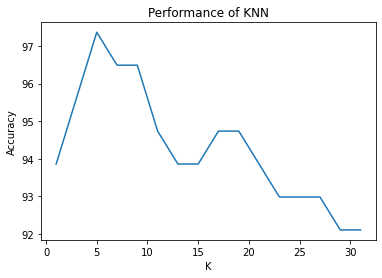

In [29]:
# Visualize K and Accuracy 

fig, ax = plt.subplots()
ax.plot(K_list, arr_K_Accuracy)
ax.set(xlabel="K",
       ylabel="Accuracy",
       title="Performance of KNN")
plt.show()